<a href="https://colab.research.google.com/github/marilynle/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Marilyn_L_E_Assignment_Regression_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [4]:
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/tribeca.csv')
pd.options.display.float_format = '{:,.0f}'.format
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [5]:
df.head()


,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,"10,013","1,840","1,909",2800000,2019-01-03
1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,"10,004","1,759",0,2650000,2019-01-07
2,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,"10,004","1,190","2,005",1005000,2019-01-09
3,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0,"1,088","2,006",1678000,2019-01-10
4,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,"10,280",873,0,1380000,2019-01-11


In [6]:
# Checking for null values
df.isnull().sum()


NEIGHBORHOOD               0
BUILDING_CLASS_CATEGORY    0
ADDRESS                    0
APARTMENT_NUMBER           0
ZIP_CODE                   0
GROSS_SQUARE_FEET          0
YEAR_BUILT                 0
SALE_PRICE                 0
SALE_DATE                  0
dtype: int64

In [7]:
df.shape


(90, 9)

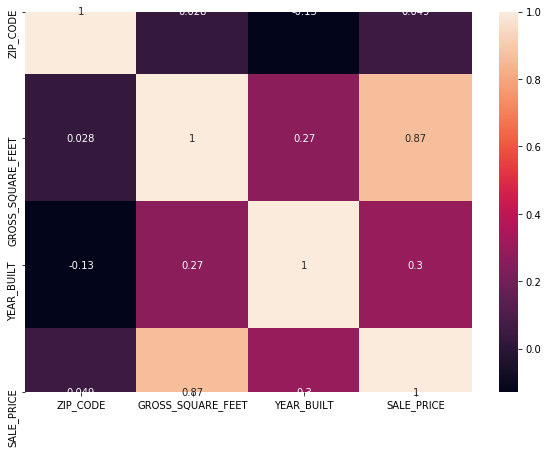

In [8]:
# Look at the data. Choose a feature, and plot its relationship with the target.

import seaborn as sns
import matplotlib.pyplot as plt

# Observing the correlation matrix
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)


In [9]:
import plotly.express as px
px.scatter(df, x='YEAR_BUILT', y='SALE_PRICE')

In [0]:
# Use scikit-learn for linear regression with one feature. You can follow the 5-step process from Jake VanderPlas.

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression


In [0]:
# 2. Instantiate this class
model = LinearRegression()

In [0]:
# 3. Arrange X features matrix & y target vector
features = ['YEAR_BUILT']
target = 'SALE_PRICE'
X_train = df[features]
y_train = df[target]


In [14]:
# 4. Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# 5. Apply the model to new data
square_feet = 1497
X_test = [[square_feet]]
y_pred = model.predict(X_test)
y_pred

array([3810529.16058511])

In [16]:
# Defining a function to make new predictions and explain the model coefficient.
def predict(x):
  m = model.coef_[0]
  b = model.intercept_
  y = (m*x)+b
  return y, m, b

predict(1)

(1795919.2584558083, 1346.6643730810808, 1794572.594082727)

In [17]:
# Stretch Goals
# Do linear regression with two or more features.

model2 = LinearRegression()
features2 = ['YEAR_BUILT', 'GROSS_SQUARE_FEET']
target2 = 'SALE_PRICE'
X_train2 = df[features2]
y_train2 = df[target2]

model.fit(X_train2, y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)